# Aghast Example

To run this example, an `dev-environment.yml` similar to this one could be used:

```yaml
name: aghast
channels:
  - conda-forge
dependencies:
  - root >=6.20.0
  - boost-histogram >=0.6.2
  - matplotlib >=3.1
  - pytest >=5
  - setuptools >=42
  - setuptools_scm >=3.4
  - flatbuffers >=1.8.0
  - aghast >0.2.1   # note that the latest version is aghast ==0.2.1
  - uproot >=3.11.3
  - uproot-methods >=0.7.3
```

In [1]:
import numpy as np
import boost_histogram as bh
import ROOT
import aghast
import uproot
import os
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.20/04


[ROOT](https://root.cern/) is a modular scientific software toolkit. It provides all the functionalities needed to deal with big data processing, statistical analysis, visualisation and storage. Format conversion between ROOT and boost-histogram often occurs in the work of Scikit-HEP. [Aghast](https://github.com/scikit-hep/aghast) is a histogramming library to provide better communication between histogramming libraries, instead of filling or plotting them. Here, you can see how to convert between ROOT and boost-histogram by Aghast.

## boost-histogram to ROOT

If you want a ROOT histogram from boost-histogram object, convert the boost-histogram object to an Aghast histogram at first, and then convert the Aghast histogram to ROOT histogram: 

In [2]:
h = bh.Histogram(bh.axis.Regular(15, -3, 3))
h.fill(np.random.normal(size=1_000_000))
w, data = h.to_numpy()

ghastly_hist = aghast.from_numpy((w, data))
# ghastly_hist.dump()

root_hist = aghast.to_root(ghastly_hist, "root_hist")
root_hist

<ROOT.TH1D object ("root_hist") at 0x7fccfcbec850>

If you want to save and load the ROOT histogram, use [uproot](https://github.com/scikit-hep/uproot) to read and write:

In [3]:
root_file = uproot.recreate("demo_root_file.root")
root_file['words'] = 'See What\'s in the ROOT File!'
root_file['hist'] = np.histogram(h.axes.centers[0], bins=data, weights=w)

root_file2 = uproot.open("demo_root_file.root")
print(root_file2['words'])
root_file2['hist'].show()

if os.path.exists("demo_root_file.root"):
    os.remove("./demo_root_file.root")

See What's in the ROOT File!
                        0                                             1.6622e+05
                        +------------------------------------------------------+
[-inf, -3)   0          |                                                      |
[-3, -2.6)   3427       |*                                                     |
[-2.6, -2.2) 9154       |***                                                   |
[-2.2, -1.8) 21842      |*******                                               |
[-1.8, -1.4) 44829      |***************                                       |
[-1.4, -1)   78020      |*************************                             |
[-1, -0.6)   1.1568e+05 |**************************************                |
[-0.6, -0.2) 1.47e+05   |************************************************      |
[-0.2, 0.2)  1.5830e+05 |***************************************************   |
[0.2, 0.6)   1.4594e+05 |***********************************************       |

## ROOT to boost-histogram

Similarly, you can convert a ROOT histogram to boost-histogram histogram. *Note that you cannot get access to the the centers of Aghast axes edges, so we need to calculate it manually.*

<BarContainer object of 30 artists>

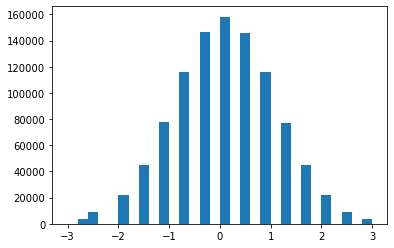

In [4]:
ghastly_hist = aghast.from_root(root_hist)
w, data = aghast.to_numpy(ghastly_hist)

h = bh.Histogram(bh.axis.Regular(30, -3, 3))
centers = [(data[idx] + data[idx+1]) / 2 for idx in range(len(data) - 1)]
h.fill(centers, weight=w)
plt.bar(h.axes[0].centers, h.view(), width=h.axes[0].widths)